**Mickey Zhang**

CS 251/2: Data Analysis and Visualization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["seaborn-v0_8-colorblind", "seaborn-v0_8-darkgrid"])
plt.rcParams["figure.figsize"] = [12, 4.5]

# Linear Regression Lab (Part A)

## Task 1: Mystery Data 1

### 1a. Import the data

1. Import data '`data/mystery_data_1.csv'` (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b. Using the following links and matplotlib documentation to view the data:

- [matplotlib](https://matplotlib.org/)
- [matplotlib hist](https://matplotlib.org/gallery/statistics/hist.html)

1. Create a figure with 3 subplots (each with a title):
   1. One scatterplot with column X on the x-axis and column Y on the y-axis.
   2. Two histograms: one for the X data, the other for the Y data. Use 10 bins in each histogram.


In [37]:
### BEGIN SOLUTION
data = np.genfromtxt("data/mystery_data_1.csv", delimiter=",", skip_header=2)

# print(data[2:12])

# ### END SOLUTION

# print(
#     """
# -----------------------------------
# Your results should look like this:
# -----------------------------------
# First 10 rows:
# [[ 9.185  0.536]
#  [29.323 -3.209]
#  [26.767  2.751]
#  [17.792 -2.81 ]
#  [14.624  2.409]
#  [ 8.078  3.677]
#  [ 3.736 -3.28 ]
#  [10.999 -2.997]
#  [18.113 -3.055]
#  [ 3.33  -0.443]]
# -----------------------------------
# """
# )

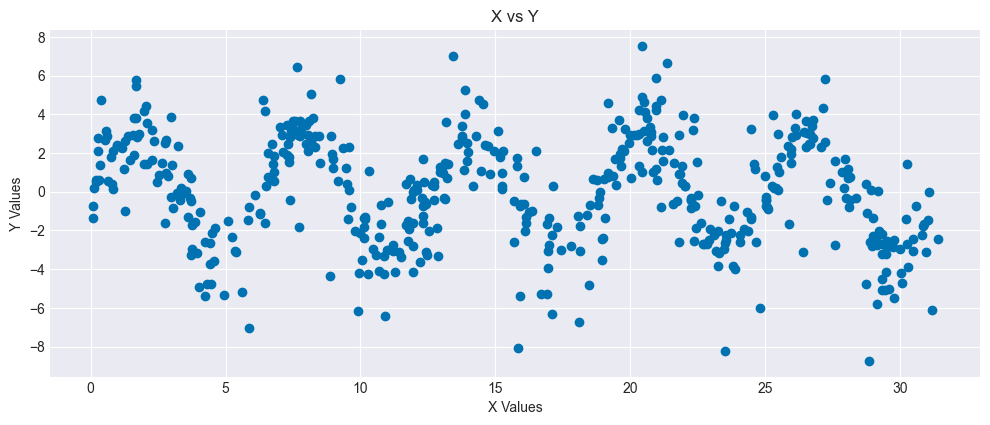

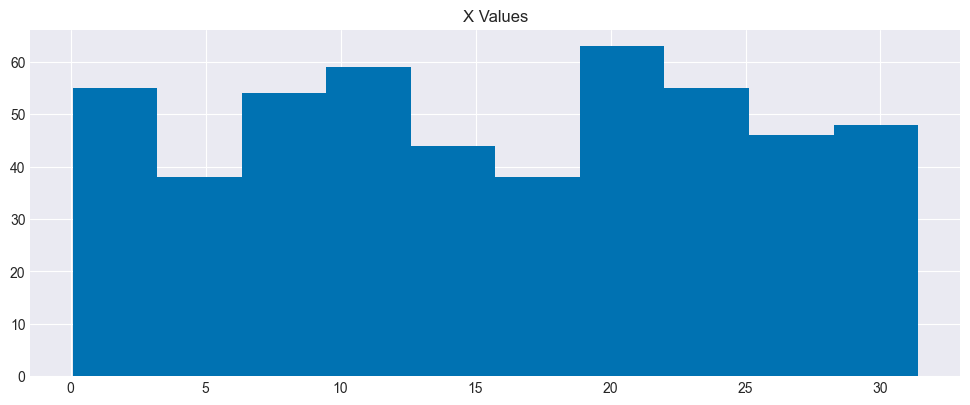

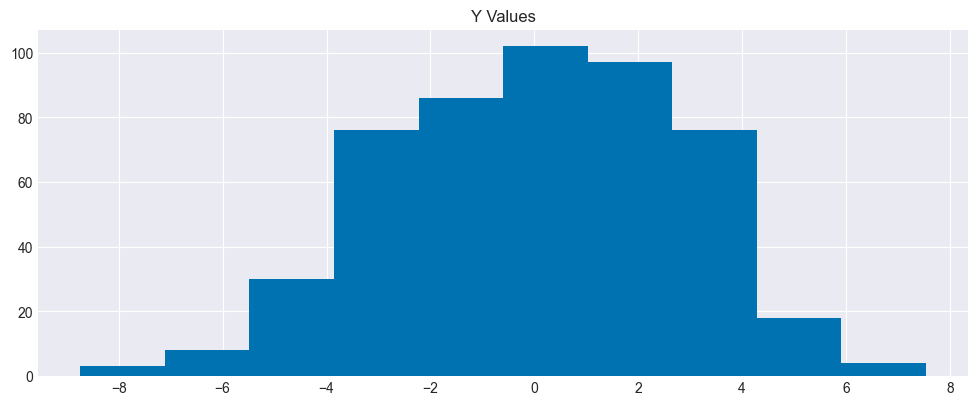

In [38]:

# scatter plot
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title("X vs Y")
plt.xlabel("X Values")
plt.ylabel("Y Values")

# two histpgrams
plt.figure()
plt.hist(data[:, 0], bins=10)
plt.title("X Values")

plt.figure()
plt.hist(data[:, 1], bins=10)
plt.title("Y Values")

plt.show()

## Task 2: Analyze Mystery Data 1

### 2a. Use scipy to calculate the linear regression for Mystery Data 1

Print first 10 lines rows of data.

Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

- The `a` parameter is the `A` array of independent data variables, the `b` parameter is the `y` array of the dependent variable values.
- Note that `A` matrix should include the column of 1s for the intercept.
- Useful: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and `np.newaxis` (or [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)).

**NOTE:** One of the things that `scipy.linalg.lstsq` returns is the **residues**, which is another name for the sum of all the squared errors (**SSE**). This is different than the residuals, which refer to just the set of errors (i.e. differences between value on regression curve and actual data sample), not their sum of squares.

Print the least-squares solved coefficients and residues.

Using the SSE, calculate and print the $R^2$ value using the following equations:

$R^2 = 1 - \frac{SSE}{smd}$

The square mean deviation: $smd = \sum_i^N \left ( y_i - \frac{1}{N} \sum_i^N y_i \right )^2$


In [39]:
import scipy.linalg

In [49]:
### BEGIN SOLUTION

# print(data[2:12])

x = data[:, 0]
y = data[:, 1]

# Matrix A
ones_col = np.ones((len(x), 1))
x_col = x.reshape(-1, 1)
A = np.hstack([ones_col, x_col])

# scipy
c, residues, rank, s = scipy.linalg.lstsq(A, y)

print(f"c: {c}")

print(f"SSE: {residues}")

smd = np.sum((y - np.mean(y))**2)

print(f"r2: {1 - (residues/smd)}")



### END SOLUTION

print(
    """
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
"""
)

c: [ 0.92884793 -0.05650709]
SSE: 3722.8001542015754
r2: 0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b. Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
   1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
   2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label


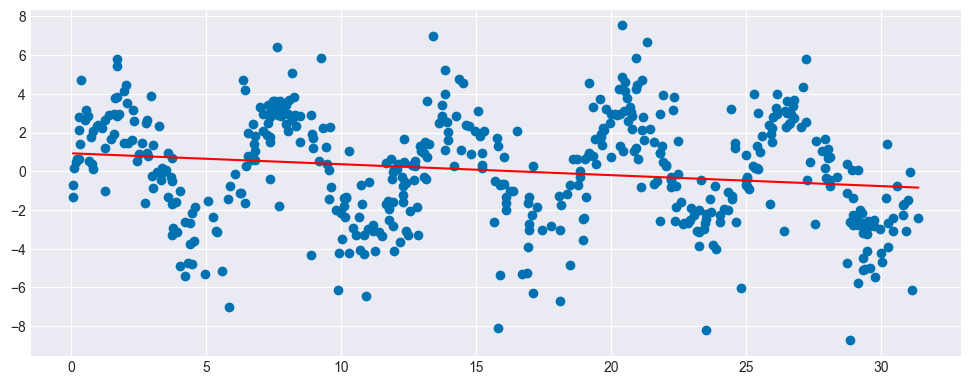

In [55]:
### BEGIN SOLUTION
plt.figure()
plt.scatter(x, y)

line_x = np.linspace(x.min(), x.max(), 100)
line_y = c[0] + c[1] * line_x

plt.plot(line_x, line_y, color="r", label="Regression")

plt.show()

### END SOLUTION

### 2c. Interpret the results of the linear regression of the dataset

**Question 1:** Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? **Why?**


**Answer 1:**

R² ≈ 0.034 means only about 3.4% of the variation in y is explained by x; the rest is “noise” or other factors.
Look at your scatter: the points don’t sit along a straight line; a line is a poor summary.
So: No, the linear regression model is not a good model for this data because R² is low and the scatter doesn’t follow a clear linear trend.
